##  Iterative Phase Estimation

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
import numpy as np

In [4]:

def CU(theta,num_qubits, exponent, name='U^(2^c)'):
    circuit = QuantumCircuit(num_qubits, name=name)
    theta = theta*2*3.14*exponent
    circuit.p(theta, 0)

    gate = circuit.to_gate()
    c_gate = gate.control()
    return c_gate

cu = CU(0.2,3, 0)

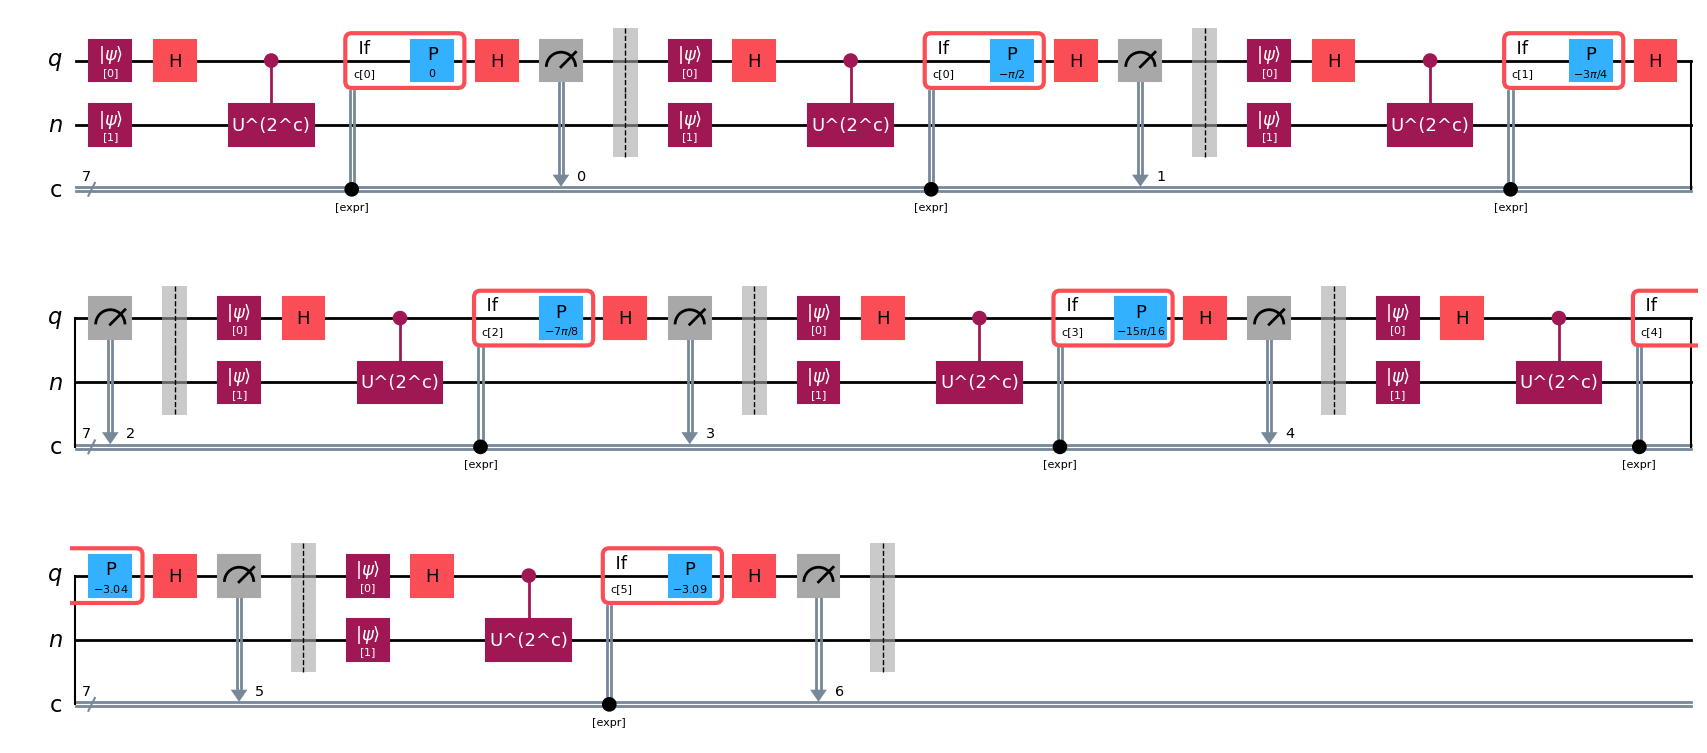

In [7]:
from qiskit.circuit.classical import expr 

c = 7 # iteration number
n = 1

qc = QuantumRegister(1, name='q')
qn = QuantumRegister(n, name='n')
cls = ClassicalRegister(c, name='c')

circuit = QuantumCircuit(qc, qn, cls)
theta = 0.2
for q in range(c):
    circuit.initialize(0, 0)
    circuit.initialize(1, 1) # to initialize to eigen vector of U
    
    circuit.h(0)
    exp = 2**(c-q-1)
    cu = CU(theta,n, exp)
    circuit.append(cu, [0,1])
    phi = 0
    test = expr.lift(cls[0])
    for cr in range(q):
        with circuit.if_test(expr.lift(cls[cr])):
            phi += 2*np.pi/(2**(cr+2))
            test = expr.lift(cls[cr])
    with circuit.if_test(test):
        circuit.p(-phi, 0)


    circuit.h(0)
    circuit.measure(0, cls[q])

    circuit.barrier()

circuit.draw('mpl')

In [8]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import transpile
backend = AerSimulator()
circuit_tp = transpile(circuit, backend)
sampler = Sampler(backend)

result = sampler.run([circuit_tp], shots=1000).result()

stats = result[0].data.c.get_counts()
print('stats: ', stats)
phase_bit = max(stats, key = lambda k: stats[k])

print('\n\n-------------------------OUTPUT------------------------')
print(f'phase bit: [ {phase_bit} ]')

phase_int = int(phase_bit, 2)/(2**c)
print(f'phase in decimals: {phase_int:.03f}')
theta = phase_int*2*np.pi
print(f'phase in degrees: {np.rad2deg(theta):.03f}')
print('-------------------------------------------------------')


stats:  {'0010110': 29, '1100001': 7, '1101110': 9, '0011010': 151, '0101010': 31, '1100101': 32, '1101001': 27, '1010110': 13, '1100110': 44, '0000001': 2, '1011010': 84, '1011001': 55, '1111010': 12, '0101001': 20, '0010010': 12, '1011101': 3, '1101010': 42, '1011011': 8, '0001001': 2, '0011011': 27, '1110010': 1, '0010101': 18, '0110111': 1, '1010101': 7, '0011001': 77, '1000101': 2, '1101100': 2, '0100101': 23, '0011110': 18, '0011101': 13, '1010111': 2, '0100110': 25, '0101101': 2, '0111010': 6, '1000010': 2, '0011000': 20, '1100010': 15, '0000111': 2, '1010010': 4, '0101011': 7, '1101000': 9, '0011111': 1, '0100100': 3, '1101011': 4, '0001010': 4, '1111011': 1, '0000101': 6, '1011110': 6, '1011000': 7, '0000010': 2, '0110100': 1, '1000110': 4, '0100010': 13, '1010001': 2, '1010100': 3, '0010001': 5, '0111001': 4, '1110001': 1, '1100111': 3, '0100001': 4, '1101111': 2, '0000000': 1, '0011100': 2, '0101110': 1, '0110101': 1, '0010100': 4, '0000110': 2, '0101000': 2, '1110110': 1, '